In [14]:
import torch
from torch.nn.functional import relu
import numpy as np
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug

In [2]:
aug = MNISTAug()
dm = DataManager()
dm.load_test()

In [5]:
aug.min_objects = 1
aug.max_objects = 1

In [11]:
image, label = aug.get_augmented(dm.x_test, dm.y_test, 1)
image = image[0]
label = label[0]

/Users/akhildevarashetti/code/ml_gallery/ml_py/lib/mnist_aug/mnist_augmenter.py:216: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


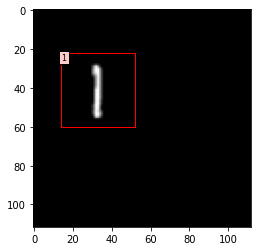

In [12]:
DataManager.plot_num(image.reshape((112, 112)), label)

In [13]:
image.shape

(112, 112)

In [76]:
trans1 = np.array([
    [1.5, 0],
    [0, 1.6]
])
trans1.shape

(2, 2)

In [77]:
indices = np.array([[i, j] for i in range(112) for j in range(112)]).reshape((112, 112, 2))
indices.shape

(112, 112, 2)

In [78]:
transformed_indices = indices @ trans1

In [79]:
transformed_indices

array([[[  0. ,   0. ],
        [  0. ,   1.6],
        [  0. ,   3.2],
        ...,
        [  0. , 174.4],
        [  0. , 176. ],
        [  0. , 177.6]],

       [[  1.5,   0. ],
        [  1.5,   1.6],
        [  1.5,   3.2],
        ...,
        [  1.5, 174.4],
        [  1.5, 176. ],
        [  1.5, 177.6]],

       [[  3. ,   0. ],
        [  3. ,   1.6],
        [  3. ,   3.2],
        ...,
        [  3. , 174.4],
        [  3. , 176. ],
        [  3. , 177.6]],

       ...,

       [[163.5,   0. ],
        [163.5,   1.6],
        [163.5,   3.2],
        ...,
        [163.5, 174.4],
        [163.5, 176. ],
        [163.5, 177.6]],

       [[165. ,   0. ],
        [165. ,   1.6],
        [165. ,   3.2],
        ...,
        [165. , 174.4],
        [165. , 176. ],
        [165. , 177.6]],

       [[166.5,   0. ],
        [166.5,   1.6],
        [166.5,   3.2],
        ...,
        [166.5, 174.4],
        [166.5, 176. ],
        [166.5, 177.6]]])

In [80]:
transformed_image = np.ones((112, 112))

for i in range(112):
    for j in range(112):
        new_i, new_j = transformed_indices[i][j]
        try:
            transformed_image[int(new_i)][int(new_j)] = image[i][j]
        except:
            pass

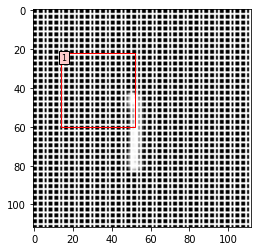

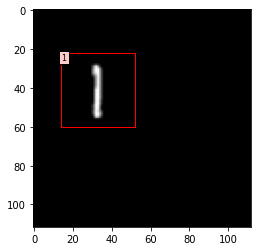

In [81]:
DataManager.plot_num(transformed_image, label)
DataManager.plot_num(image, label)